
# S11 NoSupervisat_Agrupament

__Recursos__

Principals algoritmes de clustering https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68 

K-means i avaluació dels models de clustering https://realpython.com/k-means-clustering-python/

Intro PCA - Principal component analysis con Python https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Advanced PCA - principal component analysis  https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

# S11 T01: Agrupa els diferents vols

## Nivell 0. EDA

In [1]:
# Pandas for managing datasets
import pandas as pd
import numpy as np

# Matplotlib for additional customization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [2]:
vuelos = pd.read_csv("DelayedFlights.csv")
vuelos.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df = vuelos.drop(["Unnamed: 0" ,"FlightNum", "Diverted","TailNum","Year", "Cancelled", "CancellationCode"], axis=1)
df.shape

(1936758, 23)

In [4]:
# Deleting rows with null data, based on ArrDelay variable
df.dropna(subset=["ArrDelay"], inplace=True)

In [5]:
# So, is not neccesary to delete NaN rows in all these variables.
# We just need to replace NaN for 0, in order to have a valid value.

df["CarrierDelay"].fillna(0, inplace = True)
df["WeatherDelay"].fillna(0, inplace = True)
df["NASDelay"].fillna(0, inplace = True)
df["SecurityDelay"].fillna(0, inplace = True)
df["LateAircraftDelay"].fillna(0, inplace = True)
df[["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]]
df.isna().sum().mean()

0.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 1936757
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   UniqueCarrier      object 
 8   ActualElapsedTime  float64
 9   CRSElapsedTime     float64
 10  AirTime            float64
 11  ArrDelay           float64
 12  DepDelay           float64
 13  Origin             object 
 14  Dest               object 
 15  Distance           int64  
 16  TaxiIn             float64
 17  TaxiOut            float64
 18  CarrierDelay       float64
 19  WeatherDelay       float64
 20  NASDelay           float64
 21  SecurityDelay      float64
 22  LateAircraftDelay  float64
dtypes: float64(14), int64(6), object(3)
memory usage: 353.1+ MB


In [7]:
# standarizing numerical variables
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [8]:
num_scaled = StandardScaler().fit_transform(df[num_cols])
num_scaled_df = pd.DataFrame(num_scaled, columns=num_cols)
num_scaled_df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,-1.467457,-1.452968,0.007515,1.075299,1.147281,1.096272,1.271562,-0.073631,0.221839,0.112508,-0.989701,-0.658801,0.078502,-0.533668,-0.714080,-0.342706,-0.137874,-0.345293,-0.035829,-0.455575
1,-1.467457,-1.452968,0.007515,-1.697576,-1.725146,-1.109930,-1.364954,-0.073631,0.151647,0.068804,-0.707935,-0.452290,0.078502,-0.343844,-0.574302,-0.342706,-0.137874,-0.345293,-0.035829,-0.455575
2,-1.467457,-1.452968,0.007515,-1.977306,-1.995907,-1.471243,-1.903018,-0.517705,-0.620463,-0.470220,-0.496611,-0.658801,-0.435537,-0.723491,-0.085078,-0.342706,-0.137874,-0.345293,-0.035829,-0.455575
3,-1.467457,-1.452968,0.007515,0.689005,0.676392,0.636418,0.625885,-0.600969,-0.620463,-0.455652,-0.144403,-0.170685,-0.435537,-0.723491,-0.574302,-0.287464,-0.137874,-0.345293,-0.035829,0.435274
4,-1.467457,-1.452968,0.007515,0.935434,1.053104,0.932038,1.024052,-0.448319,-0.269504,-0.309970,-0.549442,-0.339648,-0.134084,-0.533668,-0.574302,-0.342706,-0.137874,-0.345293,-0.035829,-0.455575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928366,1.692779,-0.313570,1.009494,-0.596419,-0.583238,0.012332,-0.176907,0.190038,0.249916,0.170781,-0.302896,-0.245780,0.245783,0.415450,-0.015189,-0.259843,-0.137874,-0.345293,-0.035829,0.156884
1928367,1.692779,-0.313570,1.009494,-1.912923,-2.042996,-1.288761,-1.905171,-0.087508,-0.353734,-0.441084,0.577622,0.261110,-0.494783,1.554392,1.103037,-0.342706,3.142265,0.294290,-0.035829,-0.455575
1928368,1.692779,-0.313570,1.009494,-1.135897,-1.461447,-0.841682,-1.343431,0.398198,0.123570,0.199917,1.000271,0.692906,-0.132341,0.225627,0.963259,-0.315085,-0.137874,0.329823,-0.035829,1.743709
1928369,1.692779,-0.313570,1.009494,-0.594198,-0.536149,-0.299712,-0.424417,-0.254036,-0.241427,-0.280834,-0.584662,-0.602480,-0.404172,1.174744,-0.364634,-0.342706,-0.137874,-0.345293,-0.035829,-0.455575


In [10]:
df["UniqueCarrier"].value_counts()

WN    376201
AA    190910
MQ    141223
UA    140904
OO    131780
DL    113728
XE    103147
CO     99731
US     98007
EV     81762
NW     78843
FL     70969
YV     66769
B6     54925
OH     52453
9E     51569
AS     39010
F9     28224
HA      7472
AQ       744
Name: UniqueCarrier, dtype: int64

In [11]:
# get dummies of nominal variables: "UniqueCarrier", "origin" and "dest".
carrier_dummies = pd.get_dummies(df['UniqueCarrier'], prefix='Carrier')
carrier_dummies

,Carrier_9E,Carrier_AA,Carrier_AQ,Carrier_AS,Carrier_B6,Carrier_CO,Carrier_DL,Carrier_EV,Carrier_F9,Carrier_FL,Carrier_HA,Carrier_MQ,Carrier_NW,Carrier_OH,Carrier_OO,Carrier_UA,Carrier_US,Carrier_WN,Carrier_XE,Carrier_YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1936754,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1936755,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1936756,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


I tryied to concat all the transformed data but I think it is so big (in columns) and I have error all the time.

So, I just concatenate the numeric variables transformed with UniqueCarrier dummies 

In [12]:
# Concatening all the transformed datasets
df_transf = pd.concat([num_scaled_df, num_scaled_df], axis='columns', join="inner")
df_transf
# I have problems with concatenation because it adds more columns than the original ones. 
# Finally, with the join="inner", the number of columns were the same.

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,-1.467457,-1.452968,0.007515,1.075299,1.147281,1.096272,1.271562,-0.073631,0.221839,0.112508,...,-0.989701,-0.658801,0.078502,-0.533668,-0.714080,-0.342706,-0.137874,-0.345293,-0.035829,-0.455575
1,-1.467457,-1.452968,0.007515,-1.697576,-1.725146,-1.109930,-1.364954,-0.073631,0.151647,0.068804,...,-0.707935,-0.452290,0.078502,-0.343844,-0.574302,-0.342706,-0.137874,-0.345293,-0.035829,-0.455575
2,-1.467457,-1.452968,0.007515,-1.977306,-1.995907,-1.471243,-1.903018,-0.517705,-0.620463,-0.470220,...,-0.496611,-0.658801,-0.435537,-0.723491,-0.085078,-0.342706,-0.137874,-0.345293,-0.035829,-0.455575
3,-1.467457,-1.452968,0.007515,0.689005,0.676392,0.636418,0.625885,-0.600969,-0.620463,-0.455652,...,-0.144403,-0.170685,-0.435537,-0.723491,-0.574302,-0.287464,-0.137874,-0.345293,-0.035829,0.435274
4,-1.467457,-1.452968,0.007515,0.935434,1.053104,0.932038,1.024052,-0.448319,-0.269504,-0.309970,...,-0.549442,-0.339648,-0.134084,-0.533668,-0.574302,-0.342706,-0.137874,-0.345293,-0.035829,-0.455575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928366,1.692779,-0.313570,1.009494,-0.596419,-0.583238,0.012332,-0.176907,0.190038,0.249916,0.170781,...,-0.302896,-0.245780,0.245783,0.415450,-0.015189,-0.259843,-0.137874,-0.345293,-0.035829,0.156884
1928367,1.692779,-0.313570,1.009494,-1.912923,-2.042996,-1.288761,-1.905171,-0.087508,-0.353734,-0.441084,...,0.577622,0.261110,-0.494783,1.554392,1.103037,-0.342706,3.142265,0.294290,-0.035829,-0.455575
1928368,1.692779,-0.313570,1.009494,-1.135897,-1.461447,-0.841682,-1.343431,0.398198,0.123570,0.199917,...,1.000271,0.692906,-0.132341,0.225627,0.963259,-0.315085,-0.137874,0.329823,-0.035829,1.743709
1928369,1.692779,-0.313570,1.009494,-0.594198,-0.536149,-0.299712,-0.424417,-0.254036,-0.241427,-0.280834,...,-0.584662,-0.602480,-0.404172,1.174744,-0.364634,-0.342706,-0.137874,-0.345293,-0.035829,-0.455575


In [77]:
#Taking a sample for an easy and manageable dataset
df2 = df_transf.sample(n = 5000, random_state = 42)
df2.shape

(5000, 40)

## Nivell 1. Exercici 1. Agrupa els diferents vols utilitzant l'algorisme de K-means.

__KMeans clustering with PCA__

In [79]:
pca = PCA(2)
x_pca =  pca.fit_transform(df2)
pca_df = pd.DataFrame(data = x_pca, columns = ['PC1', 'PC2'])

<AxesSubplot:xlabel='PC2', ylabel='PC1'>

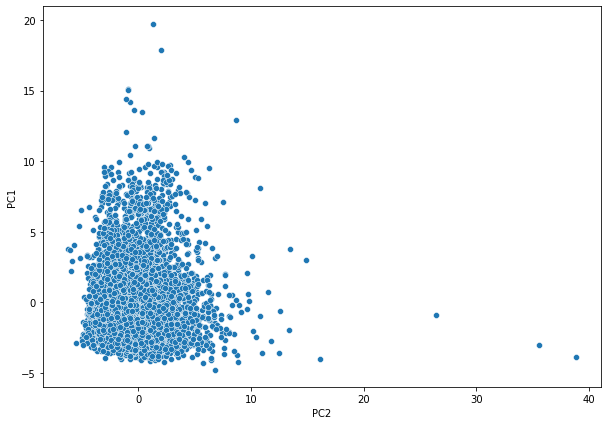

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.scatterplot(data=pca_df, x="PC2", y="PC1")

In [84]:
kmeans = KMeans(init="random",
                n_clusters=6,
                n_init=10,
                max_iter=300,
                random_state=42
                )

In [86]:
kmeans.fit(pca_df)

KMeans(init='random', n_clusters=6, random_state=42)

In [87]:
centroids = kmeans.cluster_centers_
centroids

array([[-2.25103357,  0.80836102],
       [ 0.68101514,  1.02839556],
       [-1.47571674, -2.26751103],
       [ 2.19088814, -2.01699854],
       [-0.84312121,  5.52004058],
       [ 6.59875241,  0.57154192]])

C:\Users\nuyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


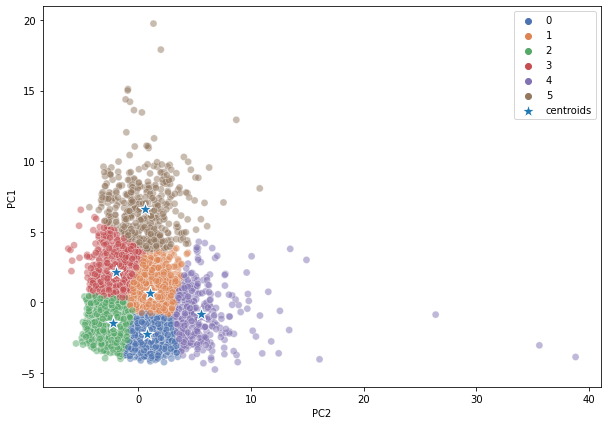

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.scatterplot(data=pca_df, y="PC1", x="PC2", palette="deep", 
                c= kmeans.labels_.astype(float), s=50, alpha=0.5, hue=kmeans.labels_
               )
sns.scatterplot(centroids[:, 1], centroids[:, 0], 
                s=200, marker = '*', label  = 'centroids'
                )
ax.legend()

The graphic above shows the six different clusters we ask for with their respective centroids

In [91]:
inertias = []
for k in range(1, 30, 2):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_) 

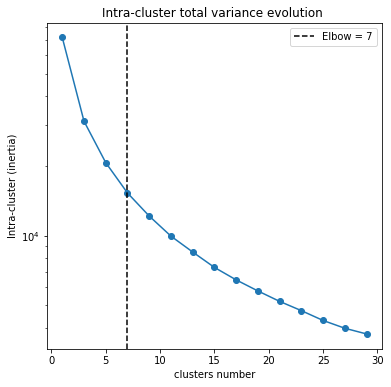

In [92]:
kl = KneeLocator(range(1, 30, 2), 
                 inertias, curve="convex", direction="decreasing"
                )

elbow = kl.elbow

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(range(1, 30, 2), inertias, marker='o')
ax.set_yscale('log')
ax.set_title("Intra-cluster total variance evolution ")
ax.set_xlabel('clusters number')
ax.set_ylabel('Intra-cluster (inertia)')
ax.axvline(x=elbow, c = 'black', linestyle='--', label=f'Elbow = {elbow}')
ax.legend()

the elbow method determine the optimal value of k. The optimum cluster is where the elbow ocurrs (k=7).

## Nivell 2. Exercici 2. Agrupa els diferents vols utilitzant l'algorisme de clustering jeràrquic.

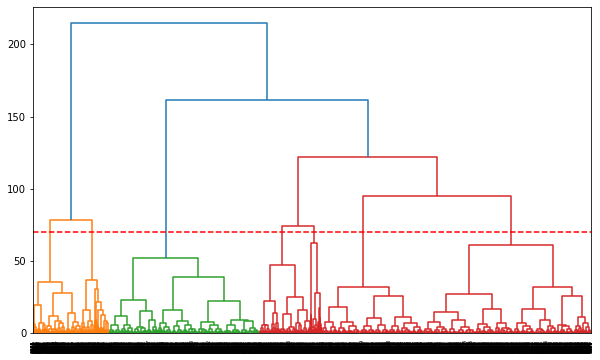

In [93]:
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(pca_df, method='ward'))
plt.axhline(y=70, color='r', linestyle='--')

The dendrogram cannot show how many clusters we have, but if we add a segmented line, we can show how it will distribute the clusters.

In [98]:
cluster_agg = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cluster_agg.fit_predict(pca_df)

array([2, 5, 2, ..., 2, 4, 2], dtype=int64)

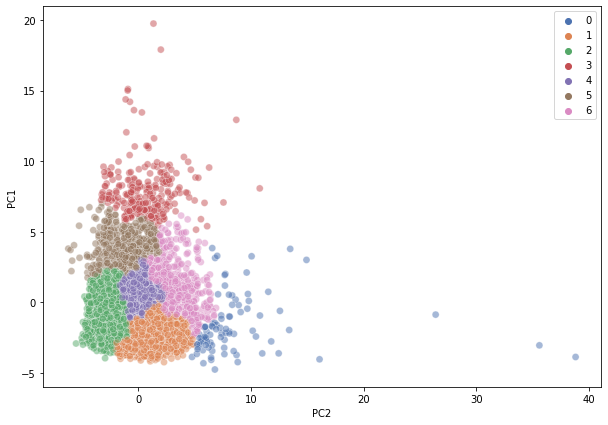

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.scatterplot(data=pca_df, y="PC1", x="PC2", palette="deep", 
                c= cluster_agg.labels_.astype(float), s=50, alpha=0.5, hue=cluster_agg.labels_
               )
ax.legend()

## Nivell 3. Exercici 3. Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

Text(0, 0.5, 'Media índices silhouette')

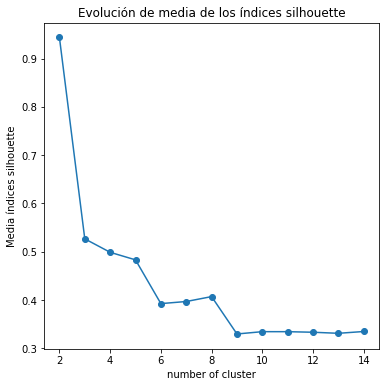

In [63]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    hier = AgglomerativeClustering(
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = hier.fit_predict(x_pca)
    silhouette_avg = silhouette_score(x_pca, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('number of cluster')
ax.set_ylabel('Media índices silhouette')

In [64]:
kmeans_labels = kmeans.predict(x_pca)
silhouette_kmeans = silhouette_score(x_pca, kmeans_labels, random_state=42)

In [65]:
silhouette_kmeans

0.4319395930287918

In [66]:
hier_labels = hier.fit_predict(x_pca)
silhouette_hier = silhouette_score(x_pca, hier_labels)

In [67]:
silhouette_hier

0.3350012386851839

In [102]:
agg_labels = hier.fit_predict(x_pca)
silhouette_agg = silhouette_score(x_pca, agg_labels)

In [103]:
silhouette_agg

0.27423848687096114

Silhouette score is high for kmeans model than the other two (hierarquical and Agglomerative), it means that means clusters are well apart from each other and clearly distinguished.